In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder,PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display="diagram")

from sklearn.decomposition import PCA,FastICA
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.utils import shuffle


from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data=load_breast_cancer(as_frame=True)

In [4]:
data=data.frame
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
len(data)

569

In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
data_corr=data.corr()

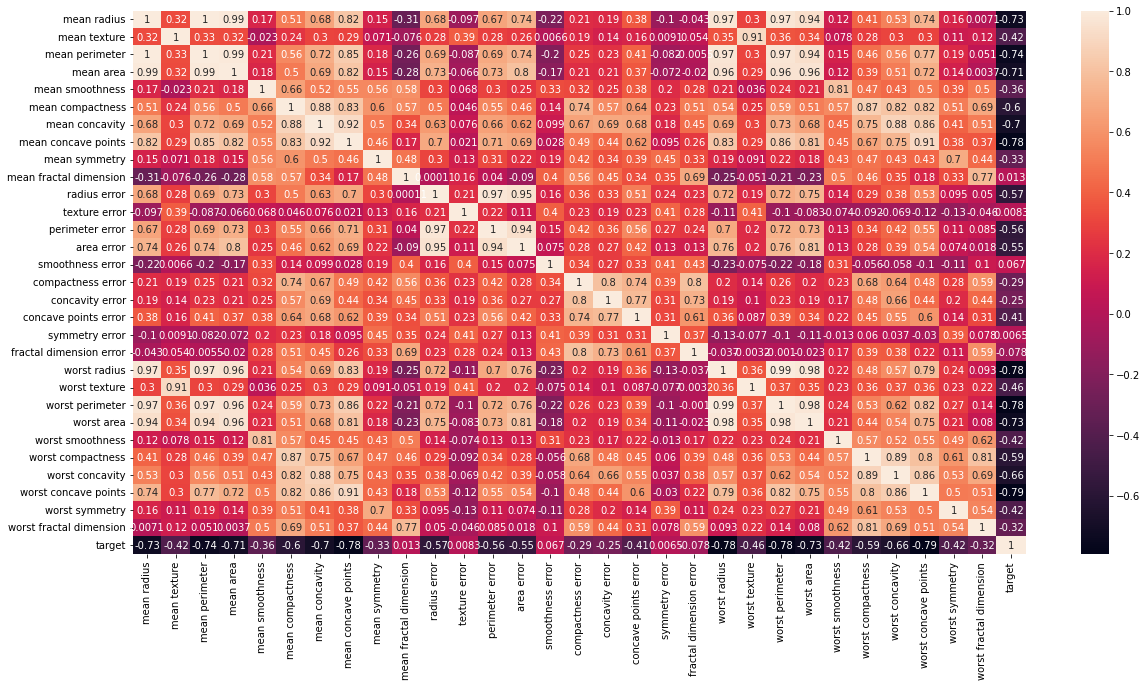

In [10]:
fig=plt.figure(figsize=(20,10))

sns.heatmap(data_corr, annot=True)

In [11]:
#checking missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
# scaled the data

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data_df=pd.DataFrame(scaled_data, columns=data.columns)
scaled_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676


## Prepare the data

In [36]:
X=scaled_data_df.drop('target', axis=1)
y=scaled_data_df['target']

# Split the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# Trying models
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
# calculate the train and test predictions
train_preds=lr.predict(X_train)
test_preds=lr.predict(X_test)

In [40]:
#Calculate the mean squared error
train_mse=mean_squared_error(y_train,train_preds)
test_mse=mean_squared_error(y_test,test_preds)

print(f'train mean squared erro: {train_mse}')
print(f'test mean squared erro: {test_mse}')

print(f'differencd of train and test mean squared error:{abs(train_mse-test_mse)}')

train mean squared erro: 0.2121491914488368
test mean squared erro: 0.3030625269983712
differencd of train and test mean squared error:0.09091333554953443


In [41]:
#Calculate the mean absolute errors
train_mae=mean_absolute_error(y_train,train_preds)
test_mae=mean_absolute_error(y_test,test_preds)

print(f'train mean absolute erro: {train_mae}')
print(f'test mean absolute erro: {test_mae}')
print(f'differencd of train and test mean absolute error:{abs(train_mae-test_mae)}')

train mean absolute erro: 0.36412381932274795
test mean absolute erro: 0.4301579388372129
differencd of train and test mean absolute error:0.06603411951446497


In the sacled cancer data set the mean absolute error is less than the mean squared error.

# Apply a Polynomail Features

In [42]:
X1=data.drop('target', axis=1)
y1=data['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe1=Pipeline(
              steps=[('poly_features1',PolynomialFeatures(degree=1,include_bias=False)),
                     ('scaler1', StandardScaler()),
                     ('lr_model1',LinearRegression())
                    ]
              )
pipe1.fit(X1_train,y1_train)
train_preds1=pipe1.predict(X1_train)
test_preds1=pipe1.predict(X1_test)

In [43]:
# Coeficients
print(pipe1.named_steps['lr_model1'].coef_)
print(pipe1.named_steps['lr_model1'].intercept_)


[ 0.47932102  0.04536214 -0.50096694  0.0276148  -0.0233397   0.29098286
 -0.02663613 -0.27888049  0.00858522 -0.02814962 -0.11021726  0.04887409
 -0.03141888  0.07849961 -0.07308377  0.03482255  0.13760528 -0.1211237
  0.01045063 -0.01570199 -0.7968081  -0.13635855  0.23803258  0.426565
  0.02509553 -0.13814084 -0.18533905  0.14667157 -0.06424693 -0.00198155]
0.6194225721784784


In [44]:
#Calculate the mean squared error
train_mse1=mean_squared_error(y1_train,train_preds1)
test_mse1=mean_squared_error(y1_test,test_preds1)

print(f'train mean squared erro: {train_mse1}')
print(f'test mean squared erro: {test_mse1}')

print(f'difference of train and test mean squared error:{abs(train_mse1-test_mse1)}')

train mean squared erro: 0.049593062183566766
test mean squared erro: 0.07084542083000947
difference of train and test mean squared error:0.021252358646442704


In [45]:
#Calculate the mean absolute errors
train_mae1=mean_absolute_error(y1_train,train_preds1)
test_mae1=mean_absolute_error(y1_test,test_preds1)

print(f'train mean absolute erro: {train_mae1}')
print(f'test mean absolute erro: {test_mae1}')
print(f'difference of train and test mean absolute error:{abs(train_mae1-test_mae1)}')

train mean absolute erro: 0.17605114807287767
test mean absolute erro: 0.20797815184353388
difference of train and test mean absolute error:0.031927003770656215


#Fitting Higher Order Polynomials

In [46]:
train_mses=[]
test_mses=[]
for i in range(1,3):
    pipe2=Pipeline(
              steps=[('poly_features1',PolynomialFeatures(degree=i,include_bias=False)),
                     ('scaler1', StandardScaler()),
                     ('lr_model1',LinearRegression())
                    ]
              )
    pipe2.fit(X1_train,y1_train)
    train_preds2=pipe2.predict(X1_train)
    test_preds2=pipe2.predict(X1_test)
    train_mses.append(mean_squared_error(y1_train,train_preds2))
    test_mses.append(mean_squared_error(y1_test,test_preds2))

In [47]:
print(train_mses.index(min(train_mses)))
print(test_mses.index(min(test_mses)))

1
0


In [48]:
def get_train_data(k):
  pipe2 = Pipeline(
              steps=[('poly_features1',PolynomialFeatures(degree=k,include_bias=False)),
                     ('scaler1', StandardScaler()),
                     ('lr_model1',LinearRegression())
                    ]
              )
  pipe2.fit(X1_train,y1_train)
  return mean_squared_error(pipe2.predict(X1_train),y1_train)

In [49]:
def get_test_data(k):
  pipe2 = Pipeline(
              steps=[('poly_features1',PolynomialFeatures(degree=k,include_bias=False)),
                     ('scaler1', StandardScaler()),
                     ('lr_model1',LinearRegression())
                    ]
              )
  pipe2.fit(X1_train,y1_train)
  return mean_squared_error(pipe2.predict(X1_test),y1_test)

In [50]:
#testing on testing data set
ks=np.array(range(1,3))
MSES_train=[get_train_data(k) for k in ks]
MSES_test=[get_test_data(k) for k in ks]

In [51]:
MSES=pd.DataFrame({'k':ks,'MSES_train':MSES_train,'MSES_test':MSES_test})
MSES

,k,MSES_train,MSES_test
0,1,4.959306e-02,0.070845
1,2,1.053572e-26,6.490089


In [52]:
MSES.idxmin()

k             0
MSES_train    1
MSES_test     0
dtype: int64

#Apply SequentialFeature Selection method

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe3=Pipeline(
    steps=[('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
           ('feature_selector',SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select=4,direction='forward')),
           ('lr_model3',LinearRegression())
           ]
           )
pipe3.fit(X1_train,y1_train)
train_pred3=pipe3.predict(X_train)
test_pred3=pipe3.predict(X_test)

In [54]:
# Coeficients
print(pipe3.named_steps['lr_model3'].coef_)
print(pipe3.named_steps['lr_model3'].intercept_)

[-9.85211583e-02 -1.18898799e-02  5.22730055e-04 -3.27298544e+00]
2.4405492463947276


In [55]:
#Calculate the mean squared error
train_mse3=mean_squared_error(y1_train,train_pred3)
test_mse3=mean_squared_error(y1_test,test_pred3)

print(f'train mean squared erro: {train_mse3}')
print(f'test mean squared erro: {test_mse3}')

print(f'difference of train and test mean squared error:{abs(train_mse3-test_mse3)}')

train mean squared erro: 12.020619541108406
test mean squared erro: 12.524387788263233
difference of train and test mean squared error:0.5037682471548273


In [56]:
#Calculate the mean absolute errors
train_mae3=mean_absolute_error(y1_train,train_pred3)
test_mae3=mean_absolute_error(y1_test,test_pred3)

print(f'train mean absolute erro: {train_mae3}')
print(f'test mean absolute erro: {test_mae3}')
print(f'difference of train and test mean absolute error:{abs(train_mae3-test_mae3)}')

train mean absolute erro: 2.945082365400499
test mean absolute erro: 3.027478246605709
difference of train and test mean absolute error:0.08239588120521013


# Cross-Validation with SequentialFeatureSelector

In [ ]:
from numpy.random import seed
all_indicies = list(range(0, len(data)))
seed(42)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [398])

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

pipe4=Pipeline(
    steps=[('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
           ('feature_selector',SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select=4,direction='forward',cv=[[train_idx, test_idx]],scoring='neg_mean_squared_error')),
           ('lr_model4',LinearRegression())
           ]
           )
pipe4.fit(X1_train,y1_train)
train_pred4=pipe4.predict(X_train)
test_pred4=pipe4.predict(X_test)

NameError: ignored

# Appying Ridge regression model

In [58]:
# Ridge regression model with defual value
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe5=Pipeline(
    steps=[('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
          ('ridge_model', Ridge(random_state=42,alpha=1))
           ]
           )
pipe5.fit(X1_train,y1_train)
train_pred5=pipe5.predict(X_train)
test_pred5=pipe5.predict(X_test)

In [59]:
# Coeficients
print(pipe5.named_steps['ridge_model'].coef_)
print(pipe5.named_steps['ridge_model'].intercept_)

[ 0.15547307  0.00453836 -0.00777676 -0.00088793 -0.12555138  0.04628509
 -0.2214287  -0.26069105 -0.10371081 -0.00172694 -0.25681399  0.02823978
 -0.01653074  0.0013725  -0.04654408  0.06452251  0.17638407 -0.02693688
 -0.03333668  0.0092158  -0.22836085 -0.01578094  0.00647022  0.00110606
 -0.26222717 -0.09792942 -0.40606642 -0.32902226 -0.32620043 -0.03043466]
2.5016461559488716


In [60]:
#Calculate the mean squared error
train_mse5=mean_squared_error(y1_train,train_pred5)
test_mse5=mean_squared_error(y1_test,test_pred5)

print(f'train mean squared erro: {train_mse5}')
print(f'test mean squared erro: {test_mse5}')

print(f'difference of train and test mean squared error:{abs(train_mse5-test_mse5)}')

train mean squared erro: 5.791618223352711
test mean squared erro: 5.561926731106912
difference of train and test mean squared error:0.22969149224579954


In [61]:
#Calculate the mean absolute errors
train_mae5=mean_absolute_error(y1_train,train_pred5)
test_mae5=mean_absolute_error(y1_test,test_pred5)

print(f'train mean absolute erro: {train_mae5}')
print(f'test mean absolute erro: {test_mae5}')
print(f'difference of train and test mean absolute error:{abs(train_mae3-test_mae5)}')

train mean absolute erro: 2.1310259765515176
test mean absolute erro: 2.1139518608792094
difference of train and test mean absolute error:0.8311305045212896


# Ridge and scaled data

In [62]:
# Ridge regression model with defual value
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe6=Pipeline(
    steps=[('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
           ('scaler',StandardScaler()),
          ('ridge_model', Ridge(random_state=42,alpha=1))
           ]
           )
pipe6.fit(X1_train,y1_train)
train_pred6=pipe6.predict(X_train)
test_pred6=pipe6.predict(X_test)

In [63]:
# Coeficients
print(pipe6.named_steps['ridge_model'].coef_)
print(pipe6.named_steps['ridge_model'].intercept_)

[-0.10581801  0.03852957 -0.07267025  0.13756521 -0.02269426  0.23266302
 -0.04528384 -0.23426922  0.01534077 -0.00380335 -0.18165883  0.04636723
 -0.00714225  0.12257178 -0.07006311  0.0300212   0.13141798 -0.10104476
  0.0124407  -0.01118709 -0.29898265 -0.12981139  0.01997738  0.2131146
  0.02089505 -0.09387698 -0.16809785  0.09335154 -0.07226605 -0.02356593]
0.619422572178478


In [64]:
#Calculate the mean squared error
train_mse6=mean_squared_error(y1_train,train_pred6)
test_mse6=mean_squared_error(y1_test,test_pred6)

print(f'train mean squared erro: {train_mse6}')
print(f'test mean squared erro: {test_mse6}')

print(f'difference of train and test mean squared error:{abs(train_mse6-test_mse6)}')

train mean squared erro: 1066.722729777527
test mean squared erro: 807.8988503897741
difference of train and test mean squared error:258.823879387753


In [65]:
#Calculate the mean absolute error
train_mae6=mean_absolute_error(y1_train,train_pred6)
test_mae6=mean_absolute_error(y1_test,test_pred6)

print(f'train mean absolute erro: {train_mae6}')
print(f'test mean absolute erro: {test_mae6}')

print(f'difference of train and test mean squared error:{abs(train_mae6-test_mae6)}')

train mean absolute erro: 23.700558040063235
test mean absolute erro: 22.958958843083483
difference of train and test mean squared error:0.7415991969797524


# Apply GridSearchCV

In [66]:
#Ridge vs. Sequential Feature Selection

# Sequential Feature Selection and GridSearchCV

In [67]:
#Sequential Feature Selection and GridSearchCV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe7=Pipeline(
    steps=[('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
           ('feature_selector',SequentialFeatureSelector(estimator=LinearRegression(),direction='forward')),
           ('lr_model7',LinearRegression())
           ]
           )

In [79]:
#apply to GridSearchCV
param_dict = {'feature_selector__n_features_to_select': [2, 3, 4, 5]}
seq_grid=GridSearchCV(estimator=pipe7,param_grid=param_dict)
seq_grid.fit(X1_train,y1_train)
train_pred7=seq_grid.predict(X_train)
test_pred7=seq_grid.predict(X_test)

In [80]:
#Calculate the mean squared error
train_mse7=mean_squared_error(y1_train,train_pred7)
test_mse7=mean_squared_error(y1_test,test_pred7)

print(f'train mean squared erro: {train_mse7}')
print(f'test mean squared erro: {test_mse7}')

print(f'difference of train and test mean squared error:{abs(train_mse7-test_mse7)}')

train mean squared erro: 377.20150054027937
test mean squared erro: 264.76240633340956
difference of train and test mean squared error:112.43909420686981


In [81]:
#Calculate the mean absolute error
train_mae7=mean_absolute_error(y1_train,train_pred7)
test_mae7=mean_absolute_error(y1_test,test_pred7)

print(f'train mean absolute erro: {train_mae7}')
print(f'test mean absolute erro: {test_mae7}')

print(f'difference of train and test mean squared error:{abs(train_mae7-test_mae7)}')

train mean absolute erro: 13.792190924163949
test mean absolute erro: 13.049808640940116
difference of train and test mean squared error:0.7423822832238329


In [82]:
best_estimator = seq_grid.best_estimator_
best_estimator

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('feature_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('lr_model7', LinearRegression())])

In [83]:
best_selector=best_estimator.named_steps['feature_selector']
best_selector

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [85]:
best_model=seq_grid.best_estimator_.named_steps['lr_model7']
best_model

LinearRegression()

In [86]:
feature_names = X1_train.columns[best_selector.get_support()]
feature_names 

Index(['smoothness error', 'worst radius', 'worst texture', 'worst area',
       'worst concave points'],
      dtype='object')

In [88]:
# Coeficients and intercepts
print(best_model.coef_)
print('\n')
print(best_model.intercept_)

[-1.84126797e+01 -1.25403139e-01 -1.19564556e-02  7.03110758e-04
 -2.96358324e+00]


2.8158590666576244


In [89]:
pd.DataFrame([best_model.coef_.T], columns = feature_names, index = ['lr_model7'])

,smoothness error,worst radius,worst texture,worst area,worst concave points
lr_model7,-18.41268,-0.125403,-0.011956,0.000703,-2.963583


# Ridge and GridSearchCV

In [91]:
#Ridge and GridSearchCV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe8=Pipeline(
    steps=[('scaler',StandardScaler()),
           ('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
           ('ridge_model8', Ridge())
           ]
           )

In [101]:
#apply to GridSearchCV
param_dict_ridge = {'ridge_model8__alpha':[0.1,1,10]}
ridge_grid=GridSearchCV(estimator=pipe8,param_grid=param_dict_ridge)
ridge_grid.fit(X1_train,y1_train)
train_pred8=ridge_grid.predict(X_train)
test_pred8=ridge_grid.predict(X_test)

In [93]:
#Calculate the mean squared error
train_mse8=mean_squared_error(y1_train,train_pred8)
test_mse8=mean_squared_error(y1_test,test_pred8)

print(f'train mean squared erro: {train_mse8}')
print(f'test mean squared erro: {test_mse8}')

print(f'difference of train and test mean squared error:{abs(train_mse8-test_mse8)}')

train mean squared erro: 1066.7227297775232
test mean squared erro: 807.8988503897733
difference of train and test mean squared error:258.8238793877499


In [94]:
#Calculate the mean absolute error
train_mae8=mean_absolute_error(y1_train,train_pred8)
test_mae8=mean_absolute_error(y1_test,test_pred8)

print(f'train mean absolute erro: {train_mae8}')
print(f'test mean absolute erro: {test_mae8}')

print(f'difference of train and test mean squared error:{abs(train_mae8-test_mae8)}')

train mean absolute erro: 23.700558040063193
test mean absolute erro: 22.95895884308347
difference of train and test mean squared error:0.741599196979724


In [96]:
best_estimator=ridge_grid.best_estimator_
best_estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ridge_model8', Ridge(alpha=1))])

In [97]:
best_model=ridge_grid.best_estimator_.named_steps['ridge_model8']
best_model

Ridge(alpha=1)

In [98]:
# Coeficients and intercepts
print(best_model.coef_)
print('\n')
print(best_model.intercept_)

[-1.84126797e+01 -1.25403139e-01 -1.19564556e-02  7.03110758e-04
 -2.96358324e+00]


2.8158590666576244


# LASSO and GridSearchCV

In [102]:
#LASSO and GridSearchCV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

pipe9=Pipeline(
    steps=[('scaler',StandardScaler()),
           ('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
            ('lasso_model9',Lasso())
           ]
           )

In [104]:
#apply to GridSearchCV
param_dict_lasso = {'lasso_model9__alpha':[0.1,1,10]}
lasso_grid=GridSearchCV(estimator=pipe9,param_grid=param_dict_lasso)
lasso_grid.fit(X1_train,y1_train)
train_pred9=lasso_grid.predict(X_train)
test_pred9=lasso_grid.predict(X_test)

In [105]:
#Calculate the mean squared error
train_mse9=mean_squared_error(y1_train,train_pred9)
test_mse9=mean_squared_error(y1_test,test_pred9)

print(f'train mean squared erro: {train_mse9}')
print(f'test mean squared erro: {test_mse9}')

print(f'difference of train and test mean squared error:{abs(train_mse9-test_mse9)}')

train mean squared erro: 10.74602675536123
test mean squared erro: 11.682337974783147
difference of train and test mean squared error:0.936311219421917


In [106]:
#Calculate the mean absolute error
train_mae9=mean_absolute_error(y1_train,train_pred9)
test_mae9=mean_absolute_error(y1_test,test_pred9)

print(f'train mean absolute erro: {train_mae9}')
print(f'test mean absolute erro: {test_mae9}')

print(f'difference of train and test mean squared error:{abs(train_mae9-test_mae9)}')

train mean absolute erro: 2.7968177838587023
test mean absolute erro: 2.836948339812222
difference of train and test mean squared error:0.040130555953519664


In [108]:
best_estimator=lasso_grid.best_estimator_
best_estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('lasso_model9', Lasso(alpha=0.1))])

In [110]:
lasso_best_model=lasso_grid.best_estimator_.named_steps['lasso_model9']
lasso_best_model

Lasso(alpha=0.1)

In [111]:
# Coeficients and intercepts
print(lasso_best_model.coef_)
print('\n')
print(lasso_best_model.intercept_)

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.04237234 -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.10434752 -0.00846929 -0.         -0.
 -0.         -0.         -0.         -0.16631087 -0.         -0.        ]


0.6194225721784777
